**This notebook demonstrates decoherence (Ramsey dephasing experiment)**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

Decoherence results in information loss arising from environmental disturbance. Examples of decoherence are:
1. energy relaxation from the excited $\ket{1}$ state to the ground state $\ket{0}$
2. dephasing (which only affects superposition states).

Decoherence causes pure states to become mixed states, which lie inside the Bloch sphere.
The density matrix form of a mixed state $\ket{\psi}$ is given by:
$$
\rho = \ket{\psi}\bra{\psi} = \sum_k p_k \ket{\psi_k}\bra{\psi_k}.
$$

*Example: demonstrate dephasing*
1. Construct a series of circuits, each starting with a single qubit in the $\ket{+}$ state
2. Measure each circuit in X after increasing amounts of time have elapsed.

In [1]:
import os, sys
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools

# Get a backend (use a real system for this experiment)
IBMQ.load_accounts()
device = backend_tools.get_device(use_sim=False, min_qubits=2)

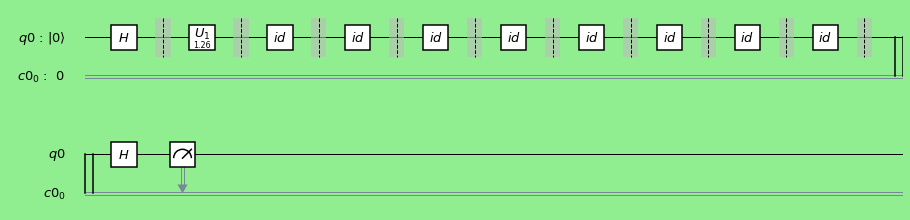

In [2]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuits
pre = QuantumCircuit(q, c)
pre.h(q)
pre.barrier()
meas_x = QuantumCircuit(q, c)
meas_x.barrier()
meas_x.h(q)
meas_x.measure(q, c)
circuits = []
exp_vector = range(1,31)
phase = 0.0
for exp_index in exp_vector:
    middle = QuantumCircuit(q, c)
    phase = phase + 6*np.pi/len(exp_vector)
    middle.u1(phase,q)
    for i in range(8*(exp_index-1)):
        middle.barrier(q)
        middle.iden(q)
    circuits.append(pre + middle + meas_x)
    
# Draw one of the circuits
%matplotlib inline
style = {'backgroundcolor': 'lightgreen'}
circuits[1].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6)

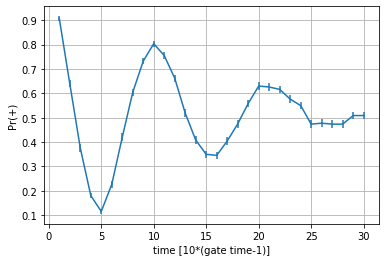

In [3]:
# Execute the circuit
shots = 1024
job = execute(circuits, backend=device, shots=shots, max_credits=10, optimization_level=0)
result = job.result()

# Plot the result
exp_data = []
exp_error = []
for exp_index in exp_vector:
    data = result.get_counts(circuits[exp_index-1])
    try:
        p0 = data['0']/shots
    except KeyError:
        p0 = 0
    exp_data.append(p0)
    exp_error.append(np.sqrt(p0*(1-p0)/shots))

plt.errorbar(exp_vector, exp_data, exp_error)
plt.xlabel('time [10*(gate time-1)]')
plt.ylabel('Pr(+)')
plt.grid(True)
plt.show()

The phase angles are:

`Circuit  1 Phase angle  0.6283
Circuit  2 Phase angle  1.2566
Circuit  3 Phase angle  1.8850
Circuit  4 Phase angle  2.5133
Circuit  5 Phase angle  3.1416
Circuit  6 Phase angle  3.7699
Circuit  7 Phase angle  4.3982
Circuit  8 Phase angle  5.0265
Circuit  9 Phase angle  5.6549
Circuit 10 Phase angle  6.2832
Circuit 11 Phase angle  6.9115
Circuit 12 Phase angle  7.5398
Circuit 13 Phase angle  8.1681
Circuit 14 Phase angle  8.7965
Circuit 15 Phase angle  9.4248
Circuit 16 Phase angle 10.0531
Circuit 17 Phase angle 10.6814
Circuit 18 Phase angle 11.3097
Circuit 19 Phase angle 11.9381
Circuit 20 Phase angle 12.5664
Circuit 21 Phase angle 13.1947
Circuit 22 Phase angle 13.8230
Circuit 23 Phase angle 14.4513
Circuit 24 Phase angle 15.0796
Circuit 25 Phase angle 15.7080
Circuit 26 Phase angle 16.3363
Circuit 27 Phase angle 16.9646
Circuit 28 Phase angle 17.5929
Circuit 29 Phase angle 18.2212
Circuit 30 Phase angle 18.8496
`

For example: circuit 5 has $\phi = \pi$, so the initial state (after the phase change) is $\ket{-}$, and because the time delay in circuit 5 is relatively short, the qubit has not decayed by the time when it is measured.

In contrast, circuit 15 also has $\phi = \pi$, so the initial state (after the phase change) is $\ket{-}$, and because the time delay in circuit 15 is relatively long, the qubit has decayed significantly by the time when it is measured.

*Example: demonstrate dephasing*
    
This is the same as the example above (with the wait time included), but measures in $Z$ instead of $X$

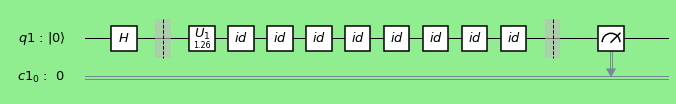

In [4]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuits
pre = QuantumCircuit(q, c)
pre.h(q)
pre.barrier()
meas_x = QuantumCircuit(q, c)
meas_x.barrier()
meas_x.measure(q, c)
circuits = []
exp_vector = range(1,31)
phase = 0.0
for exp_index in exp_vector:
    middle = QuantumCircuit(q, c)
    phase = phase + 6*np.pi/len(exp_vector)
    middle.u1(phase,q)
    for i in range(8*(exp_index-1)):
        middle.iden(q)
    circuits.append(pre + middle + meas_x)
    
# Draw one of the circuits
%matplotlib inline
style = {'backgroundcolor': 'lightgreen'}
circuits[1].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6)

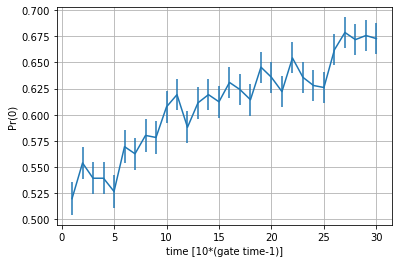

In [5]:
# Execute the circuit
shots = 1024
job = execute(circuits, backend=device, shots=shots, max_credits=10, optimization_level=0)
result = job.result()

# Plot the result
exp_data = []
exp_error = []
for exp_index in exp_vector:
    data = result.get_counts(circuits[exp_index-1])
    try:
        p0 = data['0']/shots
    except KeyError:
        p0 = 0
    exp_data.append(p0)
    exp_error.append(np.sqrt(p0*(1-p0)/shots))

plt.errorbar(exp_vector, exp_data, exp_error)
plt.xlabel('time [10*(gate time-1)]')
plt.ylabel('Pr(0)')
plt.grid(True)
plt.show()

These results show the impact of energy relaxation and phase change.